In [1]:
from scipy.integrate import *
from pandas import *
from numpy import *
from pylab import *
from scipy import *
import math
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# time change (discrete time)
T = 360.0 
delt = 1.0/240.0
t = np.linspace(0, T, int(T/delt)) #time array
#t = np.linspace(0,T,int(T/dt))
#print(t)

# array  to store  the  solution
N = np.zeros(len(t))
P = np.zeros(len(t))
N[0] = 100 #starting value
P[0] = 50 #starting value
y0 = np.array([N[0], P[0]]) #create an array with your starting values for odeint
print(y0)

[100.  50.]


In [3]:
zetas = np.linspace(0,50,50) #depth array
alpha = 1 #efficiency to use light 
k = 0.04 #attenuation constant 
print(len(zetas))

50


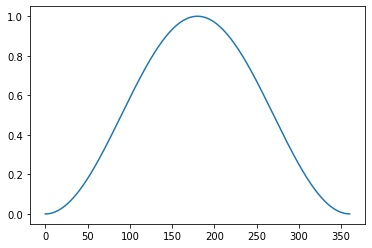

In [4]:
I_naughts = (np.sin((t/T)*2*math.pi-math.pi/2)+1)/2 #light equation for 1 year
#alpha_knots = ones(int(T/delt))
plt.plot(t,I_naughts)

In [5]:
#light reshape and changing into an array
Is = []
for I_naught in I_naughts:
    I = I_naught * np.exp(-k*zetas)
    Is.append(I)
light_att = np.array(Is)
lights = light_att.T

print(light_att.shape)
print(zetas.shape)
print(I_naughts.shape)
print(lights.shape)

(86400, 50)
(50,)
(86400,)
(50, 86400)


In [6]:
#fortran_data = np.loadtxt('/Users/kylabeth/Desktop/fortran_test/light_array.dat')

In [7]:
#fortran_data.shape

In [8]:
print(lights.shape)

(50, 86400)


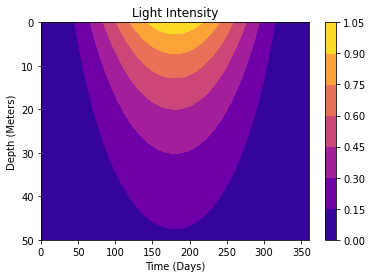

In [9]:
#contour plot of light intensity
plt.contourf(t,zetas,lights,cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Light Intensity')
plt.colorbar()
plt.savefig("light_cycle_variable", bbox_inches='tight', dpi=300)

In [10]:
#making sure light equation matches (had issues with time array until put them together in spline)
I_naughts_interp = InterpolatedUnivariateSpline(t, I_naughts)

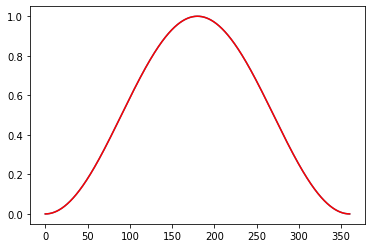

In [11]:
plt.plot(t, I_naughts)
plt.plot(t, I_naughts_interp(t), 'r')

In [12]:
#my function with light intensity and N and P models
def nbl_model(y, t, zeta, delta, alpha):
    N, P = y[0], y[1]
    I_naught = I_naughts_interp(t)
    if I_naught < 0:
        I_naught = 0.
    I = I_naught * np.exp(-k*zeta)
    dNdt = -alpha*I*N/(N+500)*P + delta*P
    dPdt = alpha*I*N/(N+500)*P - delta*P
    return np.array([dNdt, dPdt])

In [13]:
delta = 0.01 #death rate
#using odeint for functions
tim = []
for zeta in zetas:
    integ_sivz = odeint(nbl_model, y0, t, args=(zeta, delta, alpha))
    tim.append(integ_sivz)
sols = array(tim)
print(sols)

[[[100.          50.        ]
  [100.00208331  49.99791669]
  [100.00416654  49.99583346]
  ...
  [ 57.56471464  92.43528536]
  [ 57.56856608  92.43143392]
  [ 57.57241735  92.42758265]]

 [[100.          50.        ]
  [100.00208331  49.99791669]
  [100.00416654  49.99583346]
  ...
  [ 58.22992618  91.77007382]
  [ 58.2337499   91.7662501 ]
  [ 58.23757346  91.76242654]]

 [[100.          50.        ]
  [100.00208331  49.99791669]
  [100.00416654  49.99583346]
  ...
  [ 58.90145846  91.09854154]
  [ 58.90525419  91.09474581]
  [ 58.90904977  91.09095023]]

 ...

 [[100.          50.        ]
  [100.00208331  49.99791669]
  [100.00416654  49.99583346]
  ...
  [ 99.25096248  50.74903752]
  [ 99.25307701  50.74692299]
  [ 99.25519144  50.74480856]]

 [[100.          50.        ]
  [100.00208331  49.99791669]
  [100.00416654  49.99583346]
  ...
  [100.96290536  49.03709464]
  [100.96494856  49.03505144]
  [100.96699167  49.03300833]]

 [[100.          50.        ]
  [100.00208331  49.9979

<ipython-input-13-f85cc8304b66>:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  sols = array(tim)


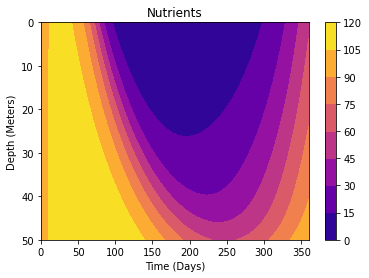

In [14]:
#contour plot of nutrients
plt.contourf(t,zetas,sols[:,:,0],cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Nutrients')
plt.colorbar()


plt.savefig("light_cycle_variable_np_nutrients", bbox_inches='tight', dpi=300)

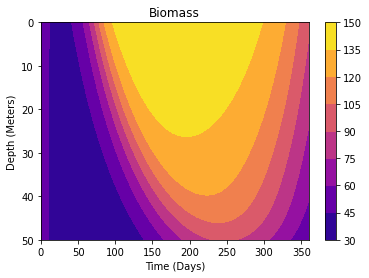

In [15]:
#contour plot of biomass
plt.contourf(t,zetas,sols[:,:,1],cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Biomass')
plt.colorbar()

plt.savefig("light_cycle_variable_np_biomass", bbox_inches='tight', dpi=300)


In [15]:
#work on seasonal success for more than 1 year! add producer and consumer into system!